Описания плана работы:
1. Создать новый ноутбук в Colab
2. Сохранить датасет в Google диске и загрузить в ноутбук Colab
https://www.kaggle.com/datasets/yasserh/titanic-dataset/code
  *Загрузить датасет по ссылке из интернета (репозитория Kaggle)
3. Перечень и описание столбцов:
- Survived - выжил (1-да, 0- нет)
- Pclass - Класс круиза
- Name - ФИО
- Sex - Пол
- Age - Возраст
- SibSp - число братьев, сестер или супругов на борту у
- человека
- Parch - количество родителей или детей, с которыми
путешествовал каждый пассажир
- Ticket - Номер билета
- Fare - Цена билета
- Cabin - Номер каюты
- Embarked - Порт посадки
4. Определить количество пустых ячеек
5. *Заполнить пустые ячейки используя любую логику замещения данных
6. Если пункт 5 не выполнен, то удалить строки имеющие пустые ячейки.
7. По каждому признаку произвести аналитику:
  1. Количество уникальных значений
  2. Минимальное и максимальное значение
8.*С помощью аналитики определить влияние всех признаков на признак Survived(
выживание).
Пример: Parch и SibSP отрицательно влияли на выживание при крушении , так как чем
больше эти параметры тем ниже процент выживания (одиночке выжить проще).
9. С помощью фреймворка MatPlotLib визуализировать результаты аналитики


https://www.kaggle.com/datasets/yasserh/titanic-dataset/code

https://drive.google.com/file/d/1yrgbsFgi-ZIc1uowpuxqdbnUNJvRNsej/view?usp=drive_link

In [1]:
! gdown --id 1yrgbsFgi-ZIc1uowpuxqdbnUNJvRNsej

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yrgbsFgi-ZIc1uowpuxqdbnUNJvRNsej
To: /content/Titanic.zip
100% 22.6k/22.6k [00:00<00:00, 76.8MB/s]


In [2]:
! unzip /content/Titanic -d  /content/Titanic

Archive:  /content/Titanic.zip
  inflating: /content/Titanic/Titanic-Dataset.csv  


In [3]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
# загружаем датасет
df = pd.read_csv('/content/Titanic/Titanic-Dataset.csv')

In [5]:
# выводим первые 5 строк
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Описание столбцов:
- Survived - выжил (1-да, 0- нет)
- Pclass - Класс круиза
- Name - ФИО
- Sex - Пол
- Age - Возраст
- SibSp - число братьев, сестер или супругов на борту у
- человека
- Parch - количество родителей или детей, с которыми
путешествовал каждый пассажир
- Ticket - Номер билета
- Fare - Цена билета
- Cabin - Номер каюты
- Embarked - Порт посадки

In [6]:
# приведем наименования столбцов к нижнему регистру
df.columns =[re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in df.columns]

In [7]:
# выводим первые 5 строк
df.head()

,passenger_id,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# вывод общей информации
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   name          891 non-null    object 
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sib_sp        891 non-null    int64  
 7   parch         891 non-null    int64  
 8   ticket        891 non-null    object 
 9   fare          891 non-null    float64
 10  cabin         204 non-null    object 
 11  embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Видим что типы данных соответствуют описанию столбцов

In [9]:
# проверка дубликатов
df.duplicated().sum()

0

In [10]:
# проверка прорпусков
df.isna().sum()

passenger_id      0
survived          0
pclass            0
name              0
sex               0
age             177
sib_sp            0
parch             0
ticket            0
fare              0
cabin           687
embarked          2
dtype: int64

Видим что присутствуют пропуски в следующих столбцах:
- Возраст - 177 пропусков
- Номер каюты - 687 пропусков
- Порт посадки - 2 пропуска

Попробуем устранить пропуски в данных

In [11]:
# посмотрим уникальные значения
df['age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [12]:
# посмотрим уникальные значения
df['cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: cabin, Length: 147, dtype: int64

In [13]:
# посмотрим уникальные значения
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [14]:
# посмотрим описательные статистики
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_id,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sib_sp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Видим что в столбцах с возрастом и номером каюты достаточнео большое количество уникальных значений, при этом в столбце с возрастом среднее и медианное значение достаточно близки. С номером каюты немного сложнее, заменить пропуски модой было бы странно, получится одна огромнаю каюта, что не возможно. Просто удалить пропуски не самое лучшее решение, т.к. отсутствуюти порядка 80% пропусков. Предлагаю заменить пропуски на 'unknown'

Предлагаю заполнить пропуски следующим образом:
- Возраст - заменить пропуски медианным значением
- Номер каюты - заменить пропуски на 'unknown'
- Порт посадки - поскольку данный параметр подразумевает только 3 варианта порта, предлагаю заменить пропуски на наиболее часто встречающееся значение - 'S'



In [15]:
# замена пропущенных значений
df.fillna({'age':df['age'].median()}, inplace=True)

In [16]:
# замена пропущенных значений
df.fillna({'cabin':'unknown'}, inplace=True)

In [17]:
# замена пропущенных значений
df.fillna({'embarked':'S'}, inplace=True)

In [18]:
# проверка прорпусков
df.isna().sum()

passenger_id    0
survived        0
pclass          0
name            0
sex             0
age             0
sib_sp          0
parch           0
ticket          0
fare            0
cabin           0
embarked        0
dtype: int64

In [19]:
# вывод колонок
df.columns

Index(['passenger_id', 'survived', 'pclass', 'name', 'sex', 'age', 'sib_sp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [20]:
# вывод количества уникальных значений
column = ['passenger_id', 'survived', 'pclass', 'name', 'sex', 'age', 'sib_sp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked']

for i in df[column]:
  print('Количество уникальных значений  в столбце ', i)
  print(df[i].nunique())

Количество уникальных значений  в столбце  passenger_id
891
Количество уникальных значений  в столбце  survived
2
Количество уникальных значений  в столбце  pclass
3
Количество уникальных значений  в столбце  name
891
Количество уникальных значений  в столбце  sex
2
Количество уникальных значений  в столбце  age
88
Количество уникальных значений  в столбце  sib_sp
7
Количество уникальных значений  в столбце  parch
7
Количество уникальных значений  в столбце  ticket
681
Количество уникальных значений  в столбце  fare
248
Количество уникальных значений  в столбце  cabin
148
Количество уникальных значений  в столбце  embarked
3


In [21]:
# вывод количества минимальных и максимальных значений
for i in df[column]:
  print('Минимальлное значение в столбце', i, ' - ', df[i].min(),', максимальное значение - ', df[i].max())


Минимальлное значение в столбце passenger_id  -  1 , максимальное значение -  891
Минимальлное значение в столбце survived  -  0 , максимальное значение -  1
Минимальлное значение в столбце pclass  -  1 , максимальное значение -  3
Минимальлное значение в столбце name  -  Abbing, Mr. Anthony , максимальное значение -  van Melkebeke, Mr. Philemon
Минимальлное значение в столбце sex  -  female , максимальное значение -  male
Минимальлное значение в столбце age  -  0.42 , максимальное значение -  80.0
Минимальлное значение в столбце sib_sp  -  0 , максимальное значение -  8
Минимальлное значение в столбце parch  -  0 , максимальное значение -  6
Минимальлное значение в столбце ticket  -  110152 , максимальное значение -  WE/P 5735
Минимальлное значение в столбце fare  -  0.0 , максимальное значение -  512.3292
Минимальлное значение в столбце cabin  -  A10 , максимальное значение -  unknown
Минимальлное значение в столбце embarked  -  C , максимальное значение -  S


Для начала посмотрим общее соотношение выживжих и погибших пассажиров

In [27]:
# группируем данные
survived = df.pivot_table(index = 'survived', values = 'passenger_id', aggfunc='count').reset_index()
survived = survived.rename(columns ={'passenger_id':'count'})
survived

,survived,count
0,0,549
1,1,342


<Axes: ylabel='count'>

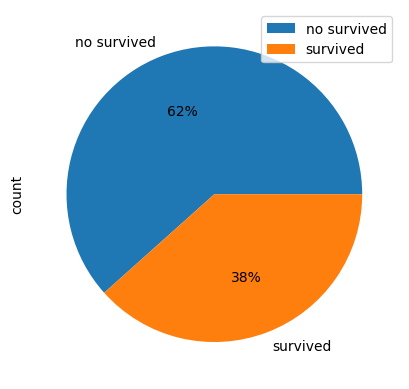

In [28]:
# визуализируем данные
survived.plot.pie(y='count',labels=['no survived','survived'],autopct='%1.0f%%')

Видим что погибло 549 пассажиров, что составляет 62% от общего числа пассажиров. Определим влияние признака SibSp - число братьев, сестер или супругов на борту у человека.

In [29]:
# группируем данные
survived = df['survived'] == 1
no_survived = df['survived'] == 0
survived_df = df[survived]
no_survived_df = df[no_survived]

In [30]:
# группируем данные
df.pivot_table(index = 'survived', columns = 'sib_sp', values = 'passenger_id', aggfunc='count')

sib_sp,0,1,2,3,4,5,8
survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


1.0


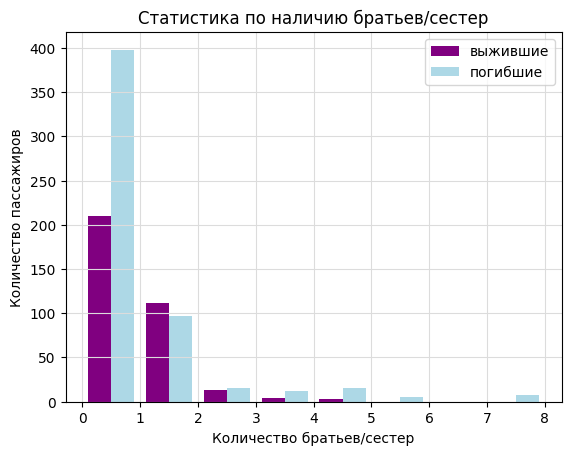

In [31]:
# визуализируем данные
data_to_plot_sib = [survived_df['sib_sp'], no_survived_df['sib_sp']]
x_points, step = np.linspace(0, 8, 9, retstep=True)
print (step)
plt.hist(data_to_plot_sib, x_points, color = ['purple', 'lightblue'], label=['выжившие', 'погибшие'])
plt.legend(loc='upper right')
plt.xlabel("Количество братьев/сестер")
plt.ylabel("Количество пассажиров")
plt.title("Статистика по наличию братьев/сестер")
plt.grid(color="gainsboro")
plt.show()

Видим, что преобладают люди путешествовавшие в одиночку, среди них наибольшее количество погибших людей, кроме того можно зхаметить что чем больше у человека на борту находилось братьев/сестер, тем выше была вероятность погибнуть. И только среди пассажиров с 1 братом/сестрой на борту количество выживших превышает количество погибших.

Теперь определим влияние признака Parch - количество родителей или детей, с которыми путешествовал каждый пассажир

In [32]:
# группируем данные
df.pivot_table(index = 'survived', columns = 'parch', values = 'passenger_id', aggfunc='count')

parch,0,1,2,3,4,5,6
survived,,,,,,,
0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,233.0,65.0,40.0,3.0,NaN,1.0,NaN


1.0


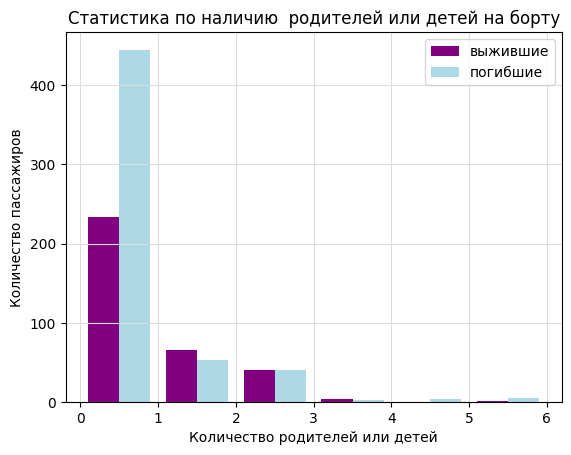

In [33]:
# визуализируем данные
data_to_plot_parch = [survived_df['parch'], no_survived_df['parch']]
x_points, step = np.linspace(0, 6, 7, retstep=True)
print (step)
plt.hist(data_to_plot_parch, x_points, color = ['purple', 'lightblue'], label=['выжившие', 'погибшие'])
plt.legend(loc='upper right')
plt.xlabel("Количество родителей или детей")
plt.ylabel("Количество пассажиров")
plt.title("Статистика по наличию  родителей или детей на борту")
plt.grid(color="gainsboro")
plt.show()

Можем наблюдать аналогичную картину - преобладают люди путешествовавшие в одиночку, среди них наибольшее количество погибших людей, и только среди пассажиров с 1 ребенком/родителем на борту количество выживших превышает количество погибших.

 Мы уже знаем, что Parch и SibSP отрицательно влияли на выживание при крушении , так как чем больше эти параметры тем ниже процент выживания (одиночке выжить проще)
 Определим так же влияние следующих признаков на признак Survived( выживание) :
- Pclass - Класс круиза
- Sex - Пол
- Age - Возраст

In [22]:
# группируем данные
df.pivot_table(index = 'survived', columns = 'pclass', values = 'passenger_id', aggfunc='count')

pclass,1,2,3
survived,,,
0,80,97,372
1,136,87,119


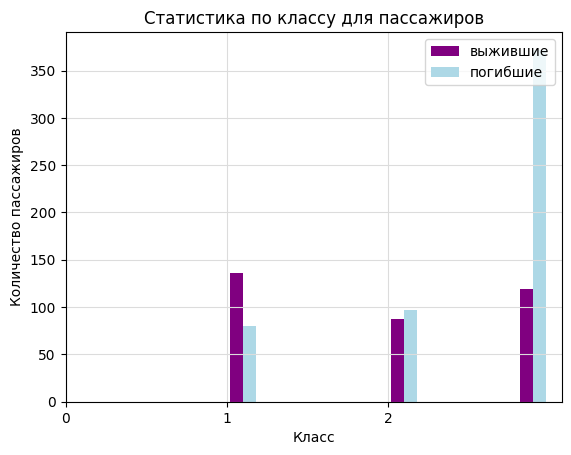

In [34]:
# визуализируем данные
FARE_CAT_COUNT = 3
fig, ax = plt.subplots()
data_to_plot_pclass = [survived_df['pclass'], no_survived_df['pclass']]
plt.hist(data_to_plot_pclass, align='mid', color = ['purple', 'lightblue'], label=['выжившие', 'погибшие'])
xtick = [i for i in range(FARE_CAT_COUNT)]
plt.legend(loc='upper right')
plt.xlabel("Класс")
plt.ylabel("Количество пассажиров")
plt.title("Статистика по классу для пассажиров")
plt.grid(color="gainsboro")
ax.set_xticks(xtick)
plt.show()

Видим что больше всего погибло пассажиров 3 класса, выжило больше пассажиров 1 класса, что вполне логично. Пассажиры 2 класса занимают средние позиции в обеих категориях

In [24]:
# группируем данные
df.pivot_table(index = 'survived', columns = 'sex', values = 'passenger_id', aggfunc='count')

sex,female,male
survived,,
0,81,468
1,233,109


1.0


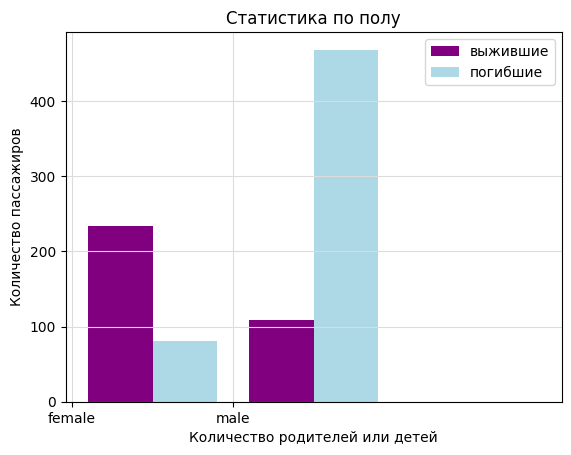

In [36]:
# визуализируем данные
data_to_plot_sex = [survived_df['sex'], no_survived_df['sex']]
x_points, step = np.linspace(0, 3, 4, retstep=True)
print (step)
plt.hist(data_to_plot_sex, x_points, color = ['purple', 'lightblue'], label=['выжившие', 'погибшие'])
plt.legend(loc='upper right')
plt.xlabel("Количество родителей или детей")
plt.ylabel("Количество пассажиров")
plt.title("Статистика по полу")
plt.grid(color="gainsboro")
plt.show()

Видим, что мужчин погибло гораздо больше, чем выжило. Кроме того большая часть женщин выжила.

In [37]:
def show_plot(data, x_points, color):
    '''
    Функция для отображения гистограммы
    @param data - данные, массив столбцов
    @param x_points - массив точек оси Х
    @param color - массив цветов для графиков
    @param label - подписи легенда
    @param xylabel - подписи осей
    @param title - заголовок
    '''
    plt.hist(data, x_points, color)
    # plt.hist(data, x_points, color, label)
    # plt.legend(loc='upper right') #расположение легенды
    # plt.xlabel(xylabel[0])
    # plt.ylabel(xylabel[1])
    # plt.title(title)
    plt.show()

10.0


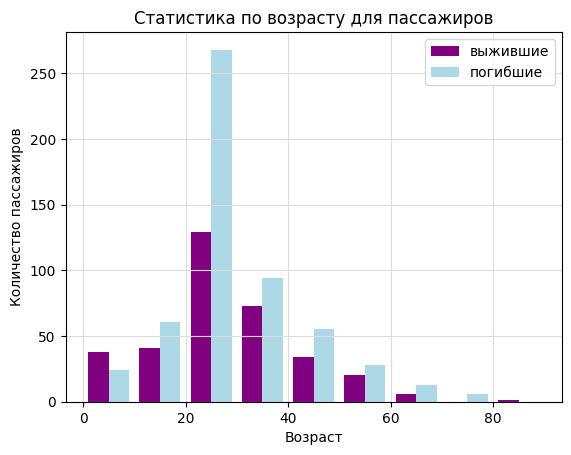

In [38]:
data_to_plot_age = [survived_df['age'], no_survived_df['age']]
# # print(data_to_plot)
# min = 0
# max = 80
# cnt = 10
# x_points = np.linspace(min, max, cnt)

# color = ['gray', 'blue']

# show_plot(data_to_plot, x_points, color)


x_points, step = np.linspace(0, 90, 10, retstep=True)
print (step)
plt.hist(data_to_plot_age, x_points, color = ['purple', 'lightblue'], label=['выжившие', 'погибшие'])
plt.legend(loc='upper right')
plt.xlabel("Возраст")
plt.ylabel("Количество пассажиров")
plt.title("Статистика по возрасту для пассажиров")
plt.grid(color="gainsboro") # Сетка
plt.show()

Мы видим, что преобладали пассажиры около 30 лет, среди них так же была наиболее высокая смертность. Число жертв выше, чем число выживших во всех группах кроме детей, и людей 50-летнего возраста.